<a href="https://colab.research.google.com/github/DeepthiManthapuram/EDA/blob/main/assesment2tekworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

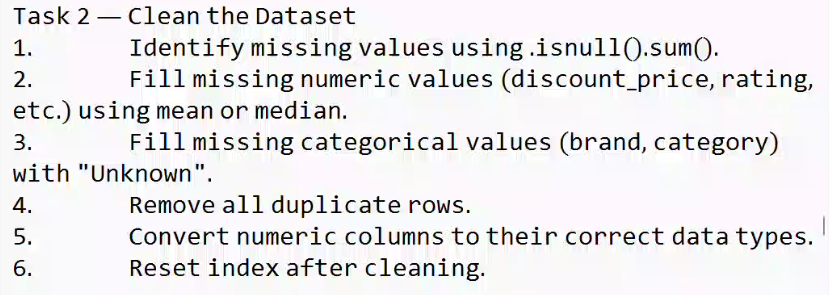

In [ ]:
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style='whitegrid')

#mount your drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/amazon_products_dataset.csv'

df = pd.read_csv(path)
print(df.head)
print(df.tail(5))
print(df.shape)
print(df.info())
df.isnull().sum()
df['discount_price'].fillna(df['discount_price'].median(),inplace=True)
print(df)
df['rating'].fillna(df['rating'].median(),inplace=True)
print(df)
df['brand'] = df['brand'].fillna("unknown")
print(df)
df['category'] = df['category'].fillna("unknown")
print(df)
df.drop_duplicates(inplace=True)
df.reset_index()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<bound method NDFrame.head of                                title    brand    category  actual_price  \
0                Smart Fitness Watch     Dell      Laptop       69890.0   
1            Laptop with SSD Storage       LG  Smartwatch       66771.0   
2            High Resolution Monitor       Mi  Headphones       43598.0   
3                   4K Action Camera       HP      Camera       63408.0   
4                Smart Fitness Watch  Samsung     Monitor       49224.0   
...                              ...      ...         ...           ...   
1995  Smartphone with AMOLED Display     Dell     Monitor       24140.0   
1996             Smart Fitness Watch       LG  Headphones       65449.0   
1997                4K Action Camera     Dell  Smartphone       21358.0   
1998        Noise Cancelling Earbuds  OnePlus  Smartwatch       35229.0   
1999  Smartphone

/tmp/ipython-input-2758464619.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['discount_price'].fillna(df['discount_price'].median(),inplace=True)
/tmp/ipython-input-2758464619.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

,index,title,brand,category,actual_price,discount_price,rating,rating_count
0,0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
...,...,...,...,...,...,...,...,...
1995,1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0


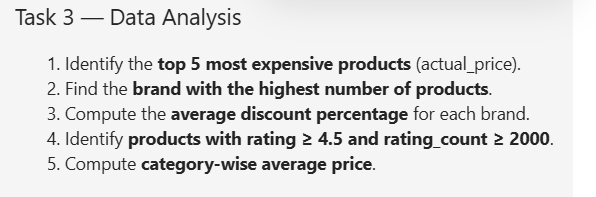

In [ ]:
print(df.nlargest(5,'actual_price'))
print(df['brand'].value_counts().idxmax())
print(df.groupby('brand')['discount_price'].mean())
print(df[(df['rating'] >= 4.5) & (df['rating_count'] >= 2000)])
print(df.groupby('category')['actual_price'].mean())


                 title  brand    category  actual_price  discount_price  \
1383    Android Tablet    JBL      Laptop       79993.0         78094.0   
1974     Gaming Laptop     LG     Monitor       79869.0         77173.0   
1403  4K Action Camera   Sony  Headphones       79857.0         77469.0   
1351    Android Tablet   Sony     Monitor       79853.0         78831.0   
42       Gaming Laptop  Apple  Smartwatch       79826.0         76919.0   

      rating  rating_count  
1383     3.0        7666.0  
1974     2.6        5232.0  
1403     2.7        1379.0  
1351     4.8        7596.0  
42       3.8       10252.0  
Boat
brand
Apple      35889.731579
Boat       36353.115888
Dell       37570.078531
HP         38354.180583
JBL        37380.390821
LG         35108.571154
Mi         36542.437569
OnePlus    39090.550490
Samsung    37931.150732
Sony       37102.337019
Name: discount_price, dtype: float64
                               title    brand    category  actual_price  \
4           

Task 4 — Programming Task: Feature Engineering + Logical Filters
Task 4A — Create New Columns
Write code to create:
discount_percent = ((actual_price - discount_price) / actual_price) * 100
price_category based on:
actual_price < 500 → "Budget"
500 ≤ price < 2000 → "Midrange"
price ≥ 2000 → "Premium"
popularity_score = rating * log(rating_count + 1)
Task 4B — Filtering Using New Columns
Using the newly created columns:
Show top 10 highest popularity_score products.
Show all Premium category items with discount_percent > 40%.
Show all products whose title contains "Bluetooth" (string filter).
Show products where:
rating >= 4.0
discount_percent between 20% to 50%
popularity_score in the top 30% percentile
(Use .between() and .quantile())
Task 4C — Grouping with New Columns
Find the average discount_percent for each brand.
Find the average popularity_score for each price_category.
Identify which category offers the highest average discount.
Calculate total revenue potential per brand using:
revenue_potential = actual_price * rating_count

In [ ]:
#task4A
df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100
print(df)
df['price_category'] = pd.cut(
    df['actual_price'],
    bins=[0, 500, 2000, float('inf')],
    labels=['Budget', 'Midrange', 'Premium'],
    right=False
)
print(df)
import numpy as np

df['popularity_score'] = df['rating'] * np.log(df['rating_count'] + 1)
#task4B
print(df.nlargest(10, 'popularity_score'))
print(df[(df['price_category'] == 'Premium') & (df['discount_percent'] > 40)])
print(df[df['title'].str.contains("Bluetooth", case=False, na=False)])
popularity_threshold = df['popularity_score'].quantile(0.70)

filtered_products = df[
    (df['rating'] >= 4.0) &
    (df['discount_percent'].between(20, 50)) &
    (df['popularity_score'] >= popularity_threshold)
]

print(filtered_products)

#task4C
print(df.groupby('brand')['discount_percent'].mean())
print(df.groupby('price_category')['popularity_score'].mean())
print(
    df.groupby('price_category')['discount_percent'].mean()
          .sort_values(ascending=False)
          .head(1)
)
df['revenue_potential'] = df['actual_price'] * df['rating_count']

print(df.groupby('brand')['revenue_potential'].sum())


                               title    brand    category  actual_price  \
0                Smart Fitness Watch     Dell      Laptop       69890.0   
1            Laptop with SSD Storage       LG  Smartwatch       66771.0   
2            High Resolution Monitor       Mi  Headphones       43598.0   
3                   4K Action Camera       HP      Camera       63408.0   
4                Smart Fitness Watch  Samsung     Monitor       49224.0   
...                              ...      ...         ...           ...   
1995  Smartphone with AMOLED Display     Dell     Monitor       24140.0   
1996             Smart Fitness Watch       LG  Headphones       65449.0   
1997                4K Action Camera     Dell  Smartphone       21358.0   
1998        Noise Cancelling Earbuds  OnePlus  Smartwatch       35229.0   
1999  Smartphone with AMOLED Display     Boat  Headphones       31662.0   

      discount_price  rating  rating_count  discount_percent price_category  \
0            65271.0

/tmp/ipython-input-88116812.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('price_category')['popularity_score'].mean())
/tmp/ipython-input-88116812.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('price_category')['discount_percent'].mean()


Task 5 — Data Visualization
Use the specific plot type mentioned:
Price distribution → Histogram + KDE
Relationship between price and rating → Scatter Plot
Category-wise average rating → Bar Plot
Brand product count → Count Plot
Numeric feature correlations → Heatmap

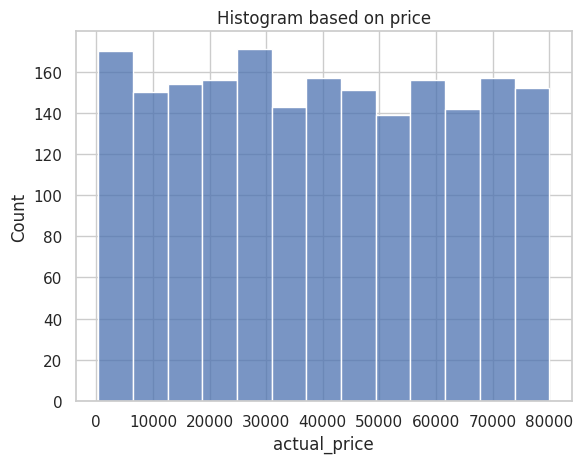

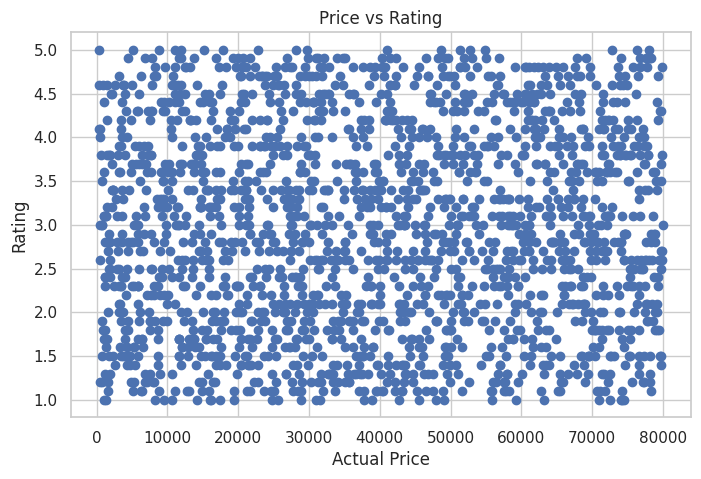

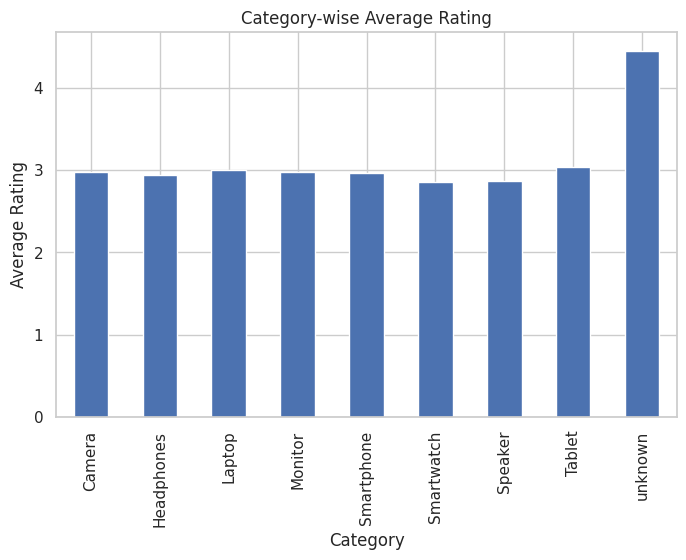

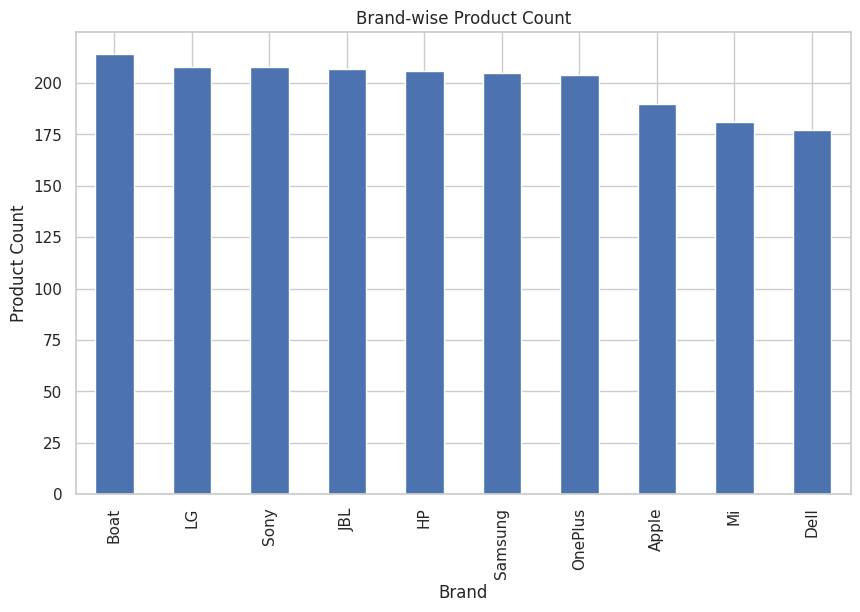

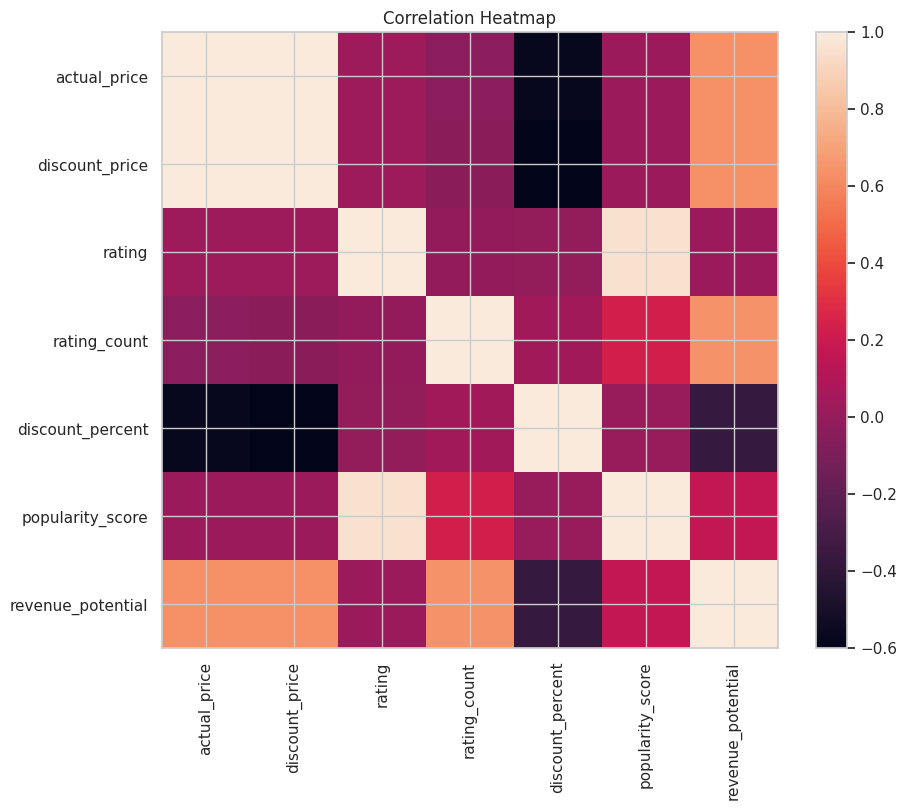

In [ ]:
sns.histplot(df['actual_price'], kde=False)
plt.title('Histogram based on price')
plt.show()
plt.figure(figsize=(8,5))
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel("Actual Price")
plt.ylabel("Rating")
plt.title("Price vs Rating")
plt.show()
category_avg_rating = df.groupby('category')['rating'].mean()

plt.figure(figsize=(8,5))
category_avg_rating.plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.title("Category-wise Average Rating")
plt.show()

brand_counts = df['brand'].value_counts()

plt.figure(figsize=(10,6))
brand_counts.plot(kind='bar')
plt.xlabel("Brand")
plt.ylabel("Product Count")
plt.title("Brand-wise Product Count")
plt.show()

numeric_df = df.select_dtypes(include=['float64','int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()


